In [ ]:
!pip install bing-image-downloader gradio

In [ ]:
from bing_image_downloader import downloader
downloader.download('Mammootty', limit=100,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)
downloader.download('Mohanlal', limit=100,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [5]:
from fastai.vision.all import *
from fastai import *

In [6]:
path = Path('dataset')
fns = get_image_files(path)
fns

(#200) [Path('dataset/Mohanlal/Image_18.jpg'),Path('dataset/Mohanlal/Image_69.jpg'),Path('dataset/Mohanlal/Image_15.jpg'),Path('dataset/Mohanlal/Image_8.jpg'),Path('dataset/Mohanlal/Image_96.jpg'),Path('dataset/Mohanlal/Image_61.jpg'),Path('dataset/Mohanlal/Image_71.jpg'),Path('dataset/Mohanlal/Image_6.jpg'),Path('dataset/Mohanlal/Image_87.gif'),Path('dataset/Mohanlal/Image_68.jpg')...]

In [7]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224, ResizeMethod.Squish),
    batch_tfms=aug_transforms()
)

In [8]:
dls = data.dataloaders(path)

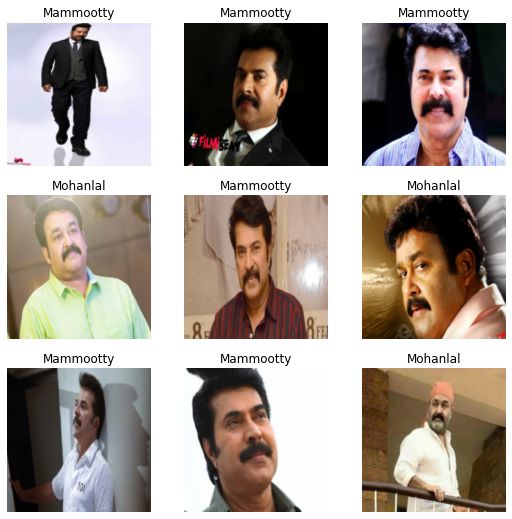

In [9]:
dls.train.show_batch()

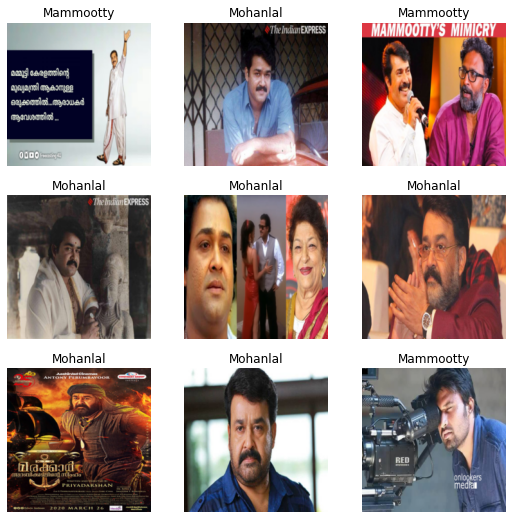

In [10]:
dls.valid.show_batch()

In [11]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [12]:
learn.fine_tune(5)

## looks overfitting

epoch,train_loss,valid_loss,error_rate,time
0,0.911954,0.880959,0.300000,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.116236,0.820660,0.300000,00:16
1,1.022327,0.716232,0.275000,00:16
2,0.959014,0.746468,0.325000,00:17
3,0.847591,0.783715,0.300000,00:18
4,0.780444,0.792563,0.300000,00:17


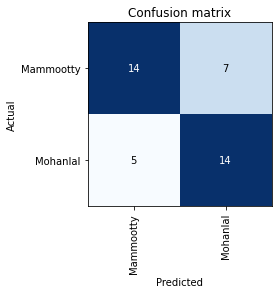

In [13]:
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()

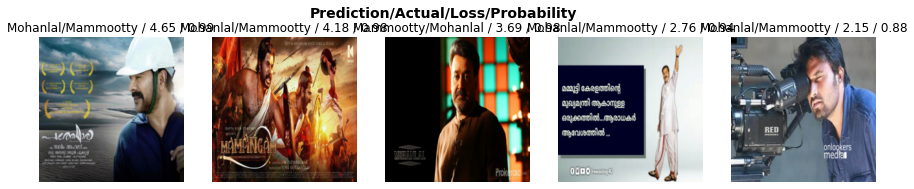

In [14]:
interep.plot_top_losses(5, nrows=1)

In [15]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [16]:
learn.export()

In [17]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [18]:
learn_inf = load_learner(path/'export.pkl')

In [19]:
learn_inf.dls.vocab

['Mammootty', 'Mohanlal']

In [41]:
def predict(img):
    pred, pred_idx, probs = learn_inf.predict(img)
    print(pred)
    return pred

In [13]:
from fastai.vision.widgets import *

In [37]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [39]:
img = PILImage.create(btn_upload.data[-1])


In [40]:
out_pl = widgets.Output()
out_pl.clear_output()

In [41]:
with out_pl:
    display(img.to_thumb(128, 128))

In [42]:
out_pl

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<PIL.Image.Image image mode=RGB size=1…

In [27]:
preds, pred_idx, probs = learn_inf.predict(img)

In [28]:
preds, pred_idx, probs

('Mammootty', tensor(0), tensor([0.5209, 0.4791]))

In [42]:
probs[pred_idx]

tensor(0.8110)

In [29]:


lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {preds}; Probability: {probs[pred_idx]:.04f}'
lbl_pred



Label(value='Prediction: Mammootty; Probability: 0.5209')

In [30]:
def Checkfunction(btn):
    img = PILImage.create(btn.data[-1])
    out_pl = widgets.Output()
    out_pl.clear_output()
    with out_pl:
        display(img.to_thumb(128, 128))
    preds, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'The actor is: {preds}, with a probablility of {probs[pred_idx]*100}%'

In [62]:
btn_upload = SimpleNamespace(data = ['dataset/Mammootty/Image_23.jpg'])

In [31]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [32]:
btn_run.on_click(Checkfunction)

In [ ]:
VBox([widgets.Label('Select your favourite actor!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

